In [ ]:
!pip install -U pandas matplotlib pyarrow

In [ ]:
%matplotlib inline

In [10]:
import pandas as pd

df = pd.read_csv("/network/rshaw/vllm-benchmarking/model_benchmarking/a100_results/results.csv")

df["tput_per_usr"] = df["tput"] / df["batch_size"]
df["num_tokens"] = df["seq_len"] * df["batch_size"]
df.head()

,model_id,seq_len,batch_size,weight_type,tput,tput_per_usr,num_tokens
0,NousResearch/Nous-Hermes-Llama2-13b,1,1,fp16,53.088570,53.088570,1
1,NousResearch/Nous-Hermes-Llama2-13b,1,4,fp16,212.542346,53.135587,4
2,NousResearch/Nous-Hermes-Llama2-13b,1,8,fp16,418.249423,52.281178,8
3,NousResearch/Nous-Hermes-Llama2-13b,1,16,fp16,798.172712,49.885794,16
4,NousResearch/Nous-Hermes-Llama2-13b,1,32,fp16,1527.452575,47.732893,32


In [17]:
def process_results(df, title, weight_types=["fp16", "gptq", "marlin"]):
    df_decode = df[df["seq_len"] == 1]
    df_prefill = df[df["seq_len"] > 1]
    
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title)
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    title_decode = f"Decode"
    title_prefill = f"Prefill (B=1)"

    scatter_tput(ax1, df_decode, title=title_decode, xlabel="Batch Size", weight_types=weight_types)
    scatter_tput(ax2, df_prefill, title=title_prefill, xlabel="Seq Len", weight_types=weight_types)

def scatter_tput(ax, df, title, xlabel, weight_types):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Layer Tok/Sec")

    for weight_type in weight_types:
        df_ = df[df["weight_type"] == weight_type]
        ax.scatter(df_["num_tokens"], df_["tput"], label=weight_type)
    ax.legend(loc='lower right')

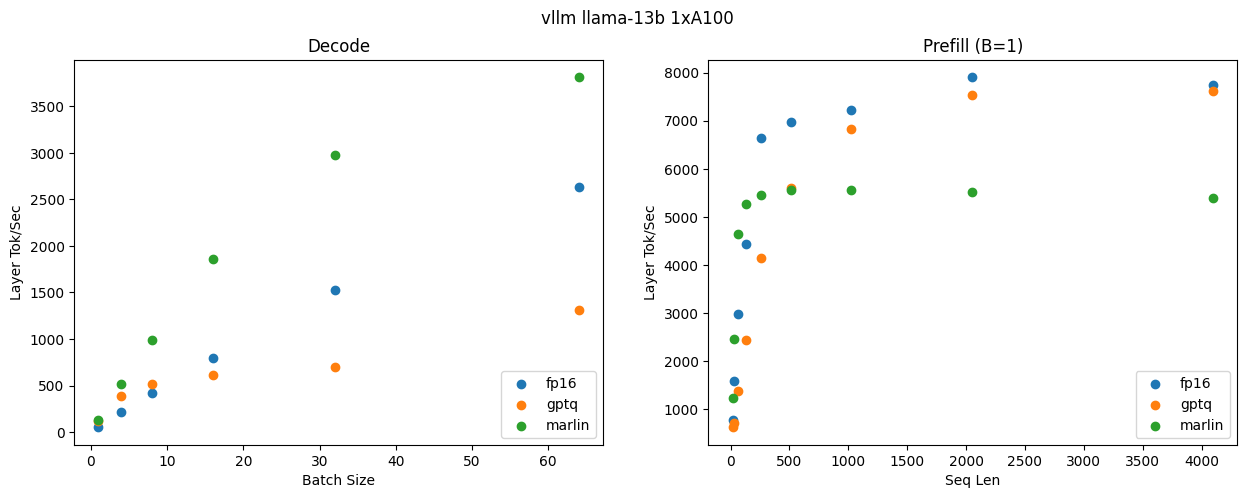

In [19]:
import matplotlib.pyplot as plt

process_results(df, title="vllm llama-13b 1xA100")

In [20]:
df[df["seq_len"] == 512]

,model_id,seq_len,batch_size,weight_type,tput,tput_per_usr,num_tokens
11,NousResearch/Nous-Hermes-Llama2-13b,512,1,fp16,6968.331903,6968.331903,512
26,TheBloke/Llama-2-13B-chat-GPTQ,512,1,gptq,5602.706207,5602.706207,512
41,robertgshaw2/llama-2-13b-chat-marlin,512,1,marlin,5558.997361,5558.997361,512


In [21]:
df[df["seq_len"] == 1024]

,model_id,seq_len,batch_size,weight_type,tput,tput_per_usr,num_tokens
12,NousResearch/Nous-Hermes-Llama2-13b,1024,1,fp16,7231.378287,7231.378287,1024
27,TheBloke/Llama-2-13B-chat-GPTQ,1024,1,gptq,6828.723679,6828.723679,1024
42,robertgshaw2/llama-2-13b-chat-marlin,1024,1,marlin,5566.290221,5566.290221,1024
